# Problem Statement

# Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
insurance = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")
insurance

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [3]:
insurance.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

# Data Cleaning

In [11]:
# Drop Columns

insurance.drop(['months_as_customer'],axis =1, inplace =True)
insurance.drop(['policy_bind_date'], axis=1, inplace =True)
insurance.drop(['policy_csl'], axis=1, inplace =True)
insurance.drop(['insured_zip'], axis=1, inplace =True)
insurance.drop(['insured_sex'], axis=1, inplace =True)
insurance.drop(['insured_education_level'], axis=1, inplace =True)
insurance.drop(['insured_occupation'], axis=1, inplace = True)

In [12]:
insurance

,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,48,OH,1000,1406.91,0,sleeping,husband,53300,0,25-01-2015,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,42,IN,2000,1197.22,5000000,reading,other-relative,0,0,21-01-2015,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,29,OH,2000,1413.14,5000000,board-games,own-child,35100,0,22-02-2015,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,41,IL,2000,1415.74,6000000,board-games,unmarried,48900,-62400,10-01-2015,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,44,IL,1000,1583.91,6000000,board-games,unmarried,66000,-46000,17-02-2015,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,38,OH,1000,1310.80,0,paintball,unmarried,0,0,22-02-2015,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,41,IL,1000,1436.79,0,sleeping,wife,70900,0,24-01-2015,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,34,OH,500,1383.49,3000000,bungie-jumping,other-relative,35100,0,23-01-2015,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,62,IL,2000,1356.92,5000000,base-jumping,wife,0,0,26-02-2015,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [14]:
insurance.drop(['authorities_contacted'],axis =1, inplace =True)

In [15]:
insurance

,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_relationship,capital-gains,capital-loss,incident_type,incident_state,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,48,OH,1000,1406.91,0,husband,53300,0,Single Vehicle Collision,SC,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,42,IN,2000,1197.22,5000000,other-relative,0,0,Vehicle Theft,VA,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,29,OH,2000,1413.14,5000000,own-child,35100,0,Multi-vehicle Collision,NY,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,41,IL,2000,1415.74,6000000,unmarried,48900,-62400,Single Vehicle Collision,OH,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,44,IL,1000,1583.91,6000000,unmarried,66000,-46000,Vehicle Theft,NY,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,38,OH,1000,1310.80,0,unmarried,0,0,Single Vehicle Collision,NC,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,41,IL,1000,1436.79,0,wife,70900,0,Single Vehicle Collision,SC,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,34,OH,500,1383.49,3000000,other-relative,35100,0,Multi-vehicle Collision,NC,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,62,IL,2000,1356.92,5000000,wife,0,0,Single Vehicle Collision,NY,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [16]:
insurance.drop(['incident_location'], axis=1, inplace =True)
insurance.drop(['incident_hour_of_the_day'], axis =1, inplace =True)
insurance.drop(['property_damage'], axis=1, inplace =True)
insurance.drop(['bodily_injuries'], axis=1, inplace =True)
insurance.drop(['auto_make'], axis=1, inplace =True)
insurance.drop(['auto_model'], axis=1, inplace=True)
insurance.drop(['auto_year'], axis=1, inplace=True)
insurance.drop(['_c39'], axis=1, inplace=True)

In [17]:
insurance

,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_relationship,capital-gains,capital-loss,incident_type,incident_state,incident_city,number_of_vehicles_involved,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,48,OH,1000,1406.91,0,husband,53300,0,Single Vehicle Collision,SC,Columbus,1,2,YES,71610,6510,13020,52080,Y
1,42,IN,2000,1197.22,5000000,other-relative,0,0,Vehicle Theft,VA,Riverwood,1,0,?,5070,780,780,3510,Y
2,29,OH,2000,1413.14,5000000,own-child,35100,0,Multi-vehicle Collision,NY,Columbus,3,3,NO,34650,7700,3850,23100,N
3,41,IL,2000,1415.74,6000000,unmarried,48900,-62400,Single Vehicle Collision,OH,Arlington,1,2,NO,63400,6340,6340,50720,Y
4,44,IL,1000,1583.91,6000000,unmarried,66000,-46000,Vehicle Theft,NY,Arlington,1,1,NO,6500,1300,650,4550,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,38,OH,1000,1310.80,0,unmarried,0,0,Single Vehicle Collision,NC,Northbrook,1,1,?,87200,17440,8720,61040,N
996,41,IL,1000,1436.79,0,wife,70900,0,Single Vehicle Collision,SC,Northbend,1,3,?,108480,18080,18080,72320,N
997,34,OH,500,1383.49,3000000,other-relative,35100,0,Multi-vehicle Collision,NC,Arlington,3,3,YES,67500,7500,7500,52500,N
998,62,IL,2000,1356.92,5000000,wife,0,0,Single Vehicle Collision,NY,Arlington,1,1,YES,46980,5220,5220,36540,N


In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
list1 = ['policy_state', 'insured_relationship', 'incident_type', 'incident_state', 'incident_city', 'police_report_available', 'fraud_reported']
for i in list1:
    insurance[i] = le.fit_transform(insurance[i].astype(str))

In [19]:
insurance

,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_relationship,capital-gains,capital-loss,incident_type,incident_state,incident_city,number_of_vehicles_involved,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,48,2,1000,1406.91,0,0,53300,0,2,4,1,1,2,2,71610,6510,13020,52080,1
1,42,1,2000,1197.22,5000000,2,0,0,3,5,5,1,0,0,5070,780,780,3510,1
2,29,2,2000,1413.14,5000000,3,35100,0,0,1,1,3,3,1,34650,7700,3850,23100,0
3,41,0,2000,1415.74,6000000,4,48900,-62400,2,2,0,1,2,1,63400,6340,6340,50720,1
4,44,0,1000,1583.91,6000000,4,66000,-46000,3,1,0,1,1,1,6500,1300,650,4550,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,38,2,1000,1310.80,0,4,0,0,2,0,4,1,1,0,87200,17440,8720,61040,0
996,41,0,1000,1436.79,0,5,70900,0,2,4,3,1,3,0,108480,18080,18080,72320,0
997,34,2,500,1383.49,3000000,2,35100,0,0,0,0,3,3,2,67500,7500,7500,52500,0
998,62,0,2000,1356.92,5000000,5,0,0,2,1,0,1,1,2,46980,5220,5220,36540,0


# Summary Statistics

In [21]:
insurance.describe()

,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_relationship,capital-gains,capital-loss,incident_type,incident_state,incident_city,number_of_vehicles_involved,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
count,1000.000000,1000.00000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,38.948000,1.01400,1136.000000,1256.406150,1.101000e+06,2.416000,25126.100000,-26793.700000,1.172000,3.242000,2.966000,1.83900,1.487000,0.971000,52761.94000,7433.420000,7399.570000,37928.950000,0.247000
std,9.140287,0.83096,611.864673,244.167395,2.297407e+06,1.681003,27872.187708,28104.096686,1.081474,2.155942,2.044266,1.01888,1.111335,0.810442,26401.53319,4880.951853,4824.726179,18886.252893,0.431483
min,19.000000,0.00000,500.000000,433.330000,-1.000000e+06,0.000000,0.000000,-111100.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000
25%,32.000000,0.00000,500.000000,1089.607500,0.000000e+00,1.000000,0.000000,-51500.000000,0.000000,1.000000,1.000000,1.00000,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,0.000000
50%,38.000000,1.00000,1000.000000,1257.200000,0.000000e+00,2.000000,0.000000,-23250.000000,1.000000,4.000000,3.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,0.000000
75%,44.000000,2.00000,2000.000000,1415.695000,0.000000e+00,4.000000,51025.000000,0.000000,2.000000,5.000000,5.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,0.000000
max,64.000000,2.00000,2000.000000,2047.590000,1.000000e+07,5.000000,100500.000000,0.000000,3.000000,6.000000,6.000000,4.00000,3.000000,2.000000,114920.00000,21450.000000,23670.000000,79560.000000,1.000000


In [22]:
insurance.skew()

age                            0.478988
policy_state                  -0.026177
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
incident_state                -0.148865
incident_city                  0.049531
number_of_vehicles_involved    0.502664
witnesses                      0.019636
police_report_available        0.052967
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
fraud_reported                 1.175051
dtype: float64

# EDA

<AxesSubplot:>

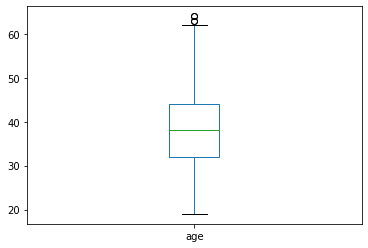

In [23]:
insurance['age'].plot.box()

<AxesSubplot:>

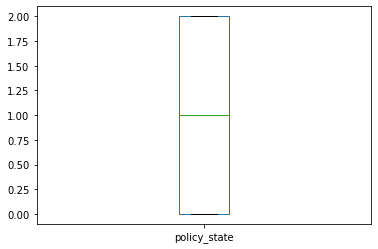

In [24]:
insurance['policy_state'].plot.box()

<AxesSubplot:>

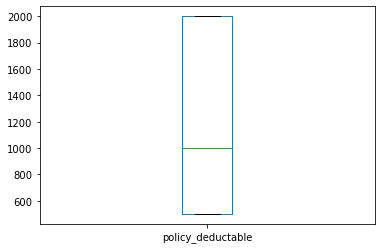

In [25]:
insurance['policy_deductable'].plot.box()

<AxesSubplot:>

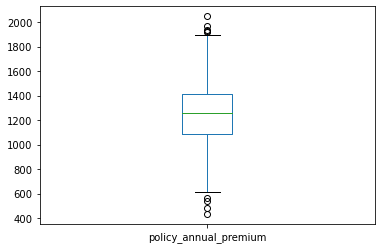

In [26]:
insurance['policy_annual_premium'].plot.box()

<AxesSubplot:>

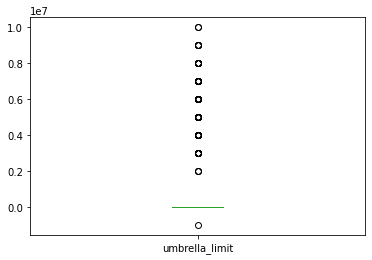

In [28]:
insurance['umbrella_limit'].plot.box()

<AxesSubplot:>

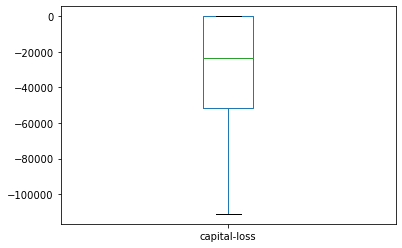

In [29]:
insurance['capital-loss'].plot.box()

<AxesSubplot:>

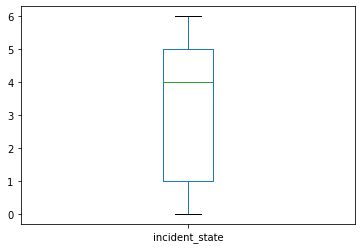

In [30]:
insurance['incident_state'].plot.box()

# Correlation

In [31]:
insurance.corr()

,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_relationship,capital-gains,capital-loss,incident_type,incident_state,incident_city,number_of_vehicles_involved,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
age,1.000000,-0.014533,0.029188,0.014404,0.018126,0.074832,-0.007075,0.007368,-0.025626,0.005770,-0.002291,0.022102,0.052359,0.014661,0.069863,0.075522,0.060898,0.062588,0.012143
policy_state,-0.014533,1.000000,0.010033,0.012455,-0.029580,-0.018506,0.074551,-0.030338,0.031848,0.008723,-0.002077,-0.042263,0.022960,0.071950,-0.006002,-0.046290,0.008406,0.001425,0.029432
policy_deductable,0.029188,0.010033,1.000000,-0.003245,0.010870,-0.022945,0.035212,-0.023544,-0.038411,0.006517,-0.045117,0.051214,0.066639,0.030166,0.022839,0.039107,0.064792,0.005269,0.014817
policy_annual_premium,0.014404,0.012455,-0.003245,1.000000,-0.006247,0.001925,-0.013738,0.023547,0.053603,0.046434,0.048724,-0.045991,0.002332,0.013624,0.009094,-0.017633,-0.011654,0.020246,-0.014480
umbrella_limit,0.018126,-0.029580,0.010870,-0.006247,1.000000,0.077495,-0.047268,-0.024056,0.015966,-0.077492,0.013094,-0.021270,-0.006738,-0.055951,-0.040344,-0.045412,-0.023790,-0.038584,0.058622
insured_relationship,0.074832,-0.018506,-0.022945,0.001925,0.077495,1.000000,-0.019439,-0.064453,0.033834,-0.062331,-0.002288,-0.047354,0.002362,-0.024200,0.002229,0.029014,0.007332,-0.006256,0.021043
capital-gains,-0.007075,0.074551,0.035212,-0.013738,-0.047268,-0.019439,1.000000,-0.046904,-0.045857,0.013833,-0.024989,0.061643,-0.017651,-0.012237,0.015980,0.025934,-0.000779,0.015836,-0.019173
capital-loss,0.007368,-0.030338,-0.023544,0.023547,-0.024056,-0.064453,-0.046904,1.000000,0.026101,-0.048651,-0.038092,-0.014895,-0.041330,-0.027218,-0.036060,-0.046060,-0.022863,-0.032665,-0.014863
incident_type,-0.025626,0.031848,-0.038411,0.053603,0.015966,0.033834,-0.045857,0.026101,1.000000,0.037083,0.022117,-0.893274,-0.007299,0.027396,-0.276686,-0.226704,-0.221409,-0.271635,-0.050376
incident_state,0.005770,0.008723,0.006517,0.046434,-0.077492,-0.062331,0.013833,-0.048651,0.037083,1.000000,0.014588,-0.037384,0.012177,0.018343,-0.043881,-0.015826,-0.026930,-0.050372,-0.051407


<AxesSubplot:>

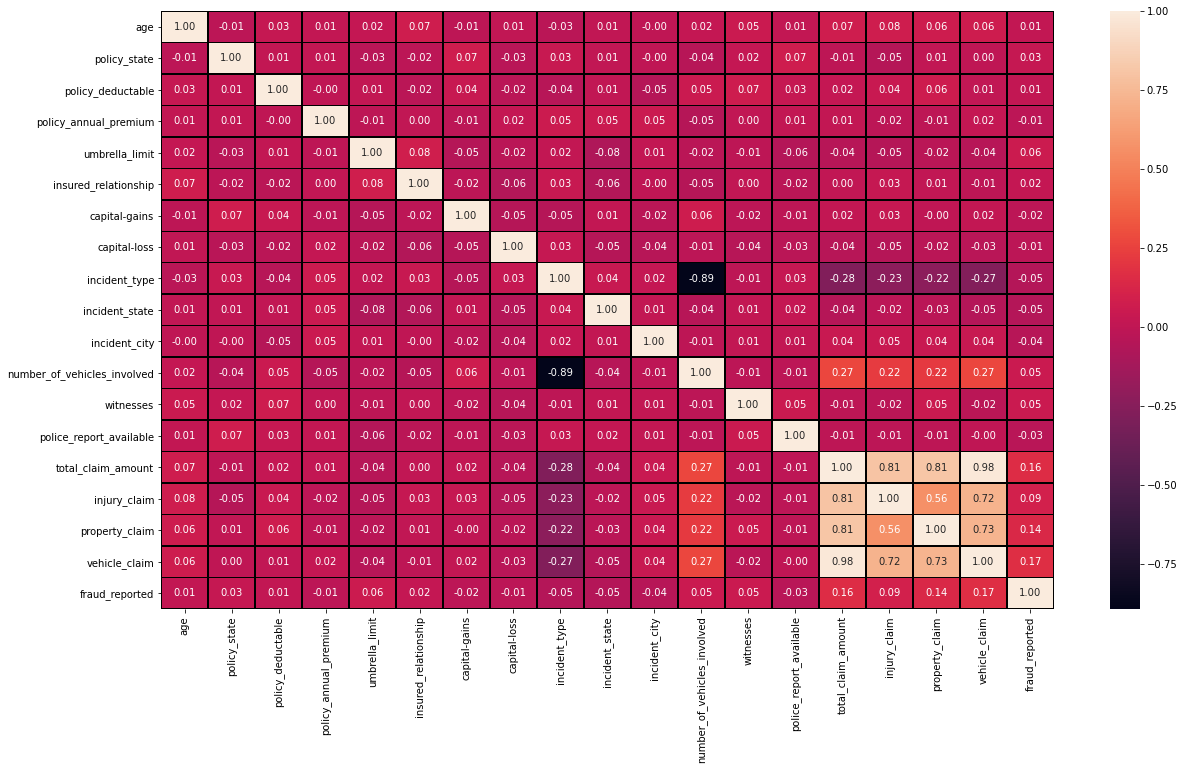

In [34]:
plt.figure(figsize = (20, 11))
sns.heatmap(insurance.corr(), annot =True, linewidth =.5, linecolor ='black', fmt ='.2f')

# Normal Distribution Curve

<AxesSubplot:xlabel='age', ylabel='Density'>

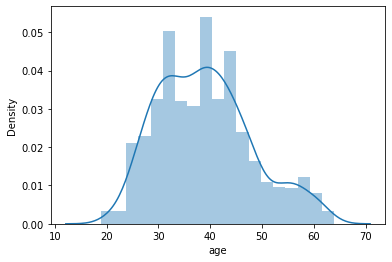

In [35]:
sns.distplot(insurance['age'])

<AxesSubplot:xlabel='policy_state', ylabel='Density'>

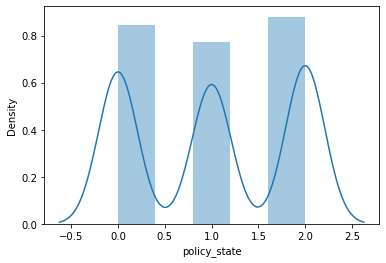

In [36]:
sns.distplot(insurance['policy_state'])

<AxesSubplot:xlabel='capital-gains', ylabel='Density'>

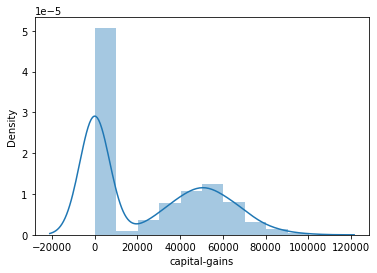

In [39]:
sns.distplot(insurance['capital-gains'])

<AxesSubplot:xlabel='capital-loss', ylabel='Density'>

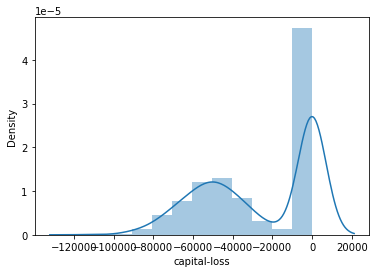

In [40]:
sns.distplot(insurance['capital-loss'])

<AxesSubplot:xlabel='fraud_reported', ylabel='Density'>

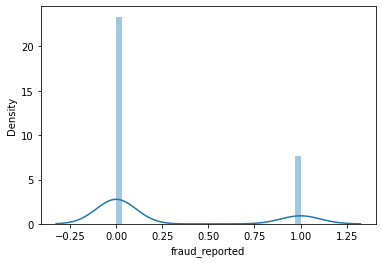

In [41]:
sns.distplot(insurance['fraud_reported'])

# Outliers

In [43]:
from scipy.stats import zscore
z = np.abs(zscore(insurance))
z

array([[0.99083647, 1.18717314, 0.22238259, ..., 1.16550497, 0.74965272,
        1.74601919],
       [0.33407345, 0.01685641, 1.41278352, ..., 1.37269599, 1.82334593,
        1.74601919],
       [1.08891308, 1.18717314, 1.41278352, ..., 0.73607206, 0.78556451,
        0.57273139],
       ...,
       [0.54161057, 1.18717314, 1.03996564, ..., 0.0208261 , 0.77190224,
        0.57273139],
       [2.52328351, 1.22088596, 1.41278352, ..., 0.45197603, 0.07357971,
        0.57273139],
       [2.3043625 , 1.18717314, 0.22238259, ..., 1.34366428, 1.81434017,
        0.57273139]])

In [44]:
threshold =3
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975], dtype=int64), array([ 4,  4,  4,  4,  4,  3,  3,  4,  4,  4,  4, 16,  4,  4,  4,  3,  7,
        4,  4,  4], dtype=int64))


In [45]:
insurance_new = insurance[(z<3).all(axis=1)]
print(insurance.shape)
print(insurance_new.shape)

(1000, 19)
(980, 19)


# Divide Data in Feature & Vector

In [46]:
x = insurance_new.drop(['fraud_reported'], axis =1)
y =insurance_new['fraud_reported']

# Remove Skewness

In [47]:
from sklearn.preprocessing import power_transform
x = power_transform(x, method ='yeo-johnson')
x

array([[ 1.0023305 ,  1.14147704,  0.06315396, ...,  0.00858172,
         1.08980208,  0.7581298 ],
       [ 0.42717141,  0.05900219,  1.27180775, ..., -1.52209542,
        -1.5637232 , -1.78748531],
       [-1.13601305,  1.14147704,  1.27180775, ...,  0.22617755,
        -0.58207486, -0.82024583],
       ...,
       [-0.47059792,  1.14147704, -1.21521142, ...,  0.1906937 ,
         0.18625419,  0.78172811],
       [ 2.12107486, -1.26576425,  1.27180775, ..., -0.24807391,
        -0.26790911, -0.10201672],
       [ 1.97656406,  1.14147704,  0.06315396, ..., -1.69309349,
        -1.49907329, -1.77993883]])

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 1.0023305 ,  1.14147704,  0.06315396, ...,  0.00858172,
         1.08980208,  0.7581298 ],
       [ 0.42717141,  0.05900219,  1.27180775, ..., -1.52209542,
        -1.5637232 , -1.78748531],
       [-1.13601305,  1.14147704,  1.27180775, ...,  0.22617755,
        -0.58207486, -0.82024583],
       ...,
       [-0.47059792,  1.14147704, -1.21521142, ...,  0.1906937 ,
         0.18625419,  0.78172811],
       [ 2.12107486, -1.26576425,  1.27180775, ..., -0.24807391,
        -0.26790911, -0.10201672],
       [ 1.97656406,  1.14147704,  0.06315396, ..., -1.69309349,
        -1.49907329, -1.77993883]])

# Model

In [50]:
lr = LogisticRegression()
for i in range(0,1000):
    x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = i, test_size = 0.20)
    lr.fit(x_train, y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    
    if round(accuracy_score(y_train, pred_train)*100,1) == round(accuracy_score(y_test, pred_test)*100,1):
        
        print("At random state", i, "The model performs very well")
        print("Random_state:-", i)
        
        print("Training r2_score is:-", accuracy_score(y_train, pred_train)*100)
        
        print("Testing r2_score is:-", accuracy_score(y_test, pred_test)*100)

At random state 5 The model performs very well
Random_state:- 5
Training r2_score is:- 76.0204081632653
Testing r2_score is:- 76.0204081632653
At random state 8 The model performs very well
Random_state:- 8
Training r2_score is:- 76.0204081632653
Testing r2_score is:- 76.0204081632653
At random state 24 The model performs very well
Random_state:- 24
Training r2_score is:- 76.0204081632653
Testing r2_score is:- 76.0204081632653
At random state 83 The model performs very well
Random_state:- 83
Training r2_score is:- 76.0204081632653
Testing r2_score is:- 76.0204081632653
At random state 94 The model performs very well
Random_state:- 94
Training r2_score is:- 76.0204081632653
Testing r2_score is:- 76.0204081632653
At random state 110 The model performs very well
Random_state:- 110
Training r2_score is:- 76.0204081632653
Testing r2_score is:- 76.0204081632653
At random state 135 The model performs very well
Random_state:- 135
Training r2_score is:- 76.0204081632653
Testing r2_score is:- 76

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state = 5)

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.76      0.98      0.86       149
           1       0.25      0.02      0.04        47

    accuracy                           0.75       196
   macro avg       0.51      0.50      0.45       196
weighted avg       0.64      0.75      0.66       196



# Cross Validation Score

In [53]:
pred_lr = lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss = accuracy_score(y_test, pred_lr)
for j in range(2,10):
    lsscore = cross_val_score(lr,x,y,cv=j)
    lsc = lsscore.mean()
    
    print("At cv:-", j)
    print("Cross validation score is:-", lsc*100)
    print("accuracy_score is:-", lss*100)
    print("\n")

At cv:- 2
Cross validation score is:- 75.40816326530613
accuracy_score is:- 76.53061224489795


At cv:- 3
Cross validation score is:- 74.89853223516756
accuracy_score is:- 76.53061224489795


At cv:- 4
Cross validation score is:- 75.20408163265306
accuracy_score is:- 76.53061224489795


At cv:- 5
Cross validation score is:- 75.51020408163265
accuracy_score is:- 76.53061224489795


At cv:- 6
Cross validation score is:- 75.5081300813008
accuracy_score is:- 76.53061224489795


At cv:- 7
Cross validation score is:- 75.61224489795919
accuracy_score is:- 76.53061224489795


At cv:- 8
Cross validation score is:- 75.61058909769424
accuracy_score is:- 76.53061224489795


At cv:- 9
Cross validation score is:- 75.40869105598973
accuracy_score is:- 76.53061224489795




In [54]:
lsscore_selected = cross_val_score(lr,x,y,cv= 5).mean()
print("The cv score is: ", lsscore_selected, "\nThe accuracy score is: ", lss)

The cv score is:  0.7551020408163265 
The accuracy score is:  0.7653061224489796


# Naive Bayes Classification

In [55]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [56]:
predgnb = gnb.predict(x_test)
print(accuracy_score(predgnb, y_test))

0.5561224489795918


In [57]:
print(confusion_matrix(y_test, predgnb))
print(classification_report(y_test, predgnb))

[[88 61]
 [26 21]]
              precision    recall  f1-score   support

           0       0.77      0.59      0.67       149
           1       0.26      0.45      0.33        47

    accuracy                           0.56       196
   macro avg       0.51      0.52      0.50       196
weighted avg       0.65      0.56      0.59       196



# SVC

In [58]:
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf')
svc.fit(x_train, y_train)

SVC()

In [59]:
predsvc = svc.predict(x_test)
print('actual and predicted value score', accuracy_score(y_test, predsvc))

actual and predicted value score 0.7602040816326531


In [60]:
from sklearn.svm import SVC
svc = SVC(kernel = 'poly')
svc.fit(x_train, y_train)

SVC(kernel='poly')

In [61]:
predsvc = svc.predict(x_test)
print('actual and predicted value score', accuracy_score(y_test, predsvc))

actual and predicted value score 0.75


In [62]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear')
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [63]:
predsvc = svc.predict(x_test)
print('actual and predicted value score', accuracy_score(y_test, predsvc))

actual and predicted value score 0.7602040816326531


# KNN Classifier

In [64]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)
predknn = knn.predict(x_test)
predknn

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0])

In [65]:
print(classification_report(y_test, predknn))

              precision    recall  f1-score   support

           0       0.75      0.89      0.81       149
           1       0.15      0.06      0.09        47

    accuracy                           0.69       196
   macro avg       0.45      0.47      0.45       196
weighted avg       0.61      0.69      0.64       196



# Decision Tree Classifier

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
dct = DecisionTreeClassifier()
dct.fit(x_train, y_train)
preddct = dct.predict(x_test)
preddct

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1])

In [68]:
print(classification_report(y_test, preddct))

              precision    recall  f1-score   support

           0       0.75      0.66      0.70       149
           1       0.22      0.30      0.25        47

    accuracy                           0.58       196
   macro avg       0.48      0.48      0.48       196
weighted avg       0.62      0.58      0.60       196



Best performing model is Logistic Regression

# AUC ROC Curve

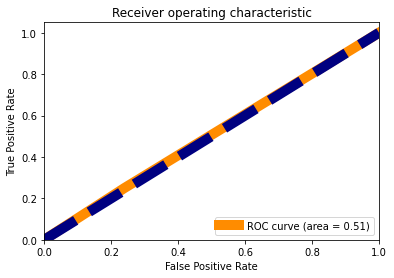

In [69]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(pred_test, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color = 'darkorange', lw = 10, label = 'ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color ='navy',lw=10,linestyle = '--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')

plt.legend(loc = "lower right")
plt.show()

# Model Saving

In [71]:
import pickle
import pickle
filename = 'Insurance_Claim_Fraud_project.pkl'
pickle.dump(lr, open(filename, 'wb'))

# Conclusion

In [73]:
a = np.array(y_test)
predicted = np.array(lr.predict(x_test))
con = pd.DataFrame({"original": a, "predicted": predicted}, index = range(len(a)))
con

,original,predicted
0,0,0
1,1,0
2,1,0
3,0,0
4,0,0
...,...,...
191,0,0
192,0,0
193,0,0
194,0,0
